# Relationship between quantitatives or qualitatives variables

# Scatterplot, Simple Linear Regression, Pearson correlation coefficient, Heatmap, 2D point density, Contingency table

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

from warnings import filterwarnings
filterwarnings('ignore')

from scipy import stats

In [2]:
# import data
# files are in the folder 'data_files'
dd = pd.read_csv(r"NHANES.csv")
dd.head(10) 

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0
5,83737,2.0,2.0,NaN,2,2,72,1,2.0,2.0,...,122.0,58.0,64.4,150.0,28.6,34.4,33.5,31.4,92.9,NaN
6,83741,1.0,NaN,8.0,1,1,22,4,1.0,4.0,...,112.0,74.0,76.6,165.4,28.0,38.8,38.0,34.0,86.6,NaN
7,83742,1.0,NaN,1.0,2,2,32,1,2.0,4.0,...,114.0,70.0,64.5,151.3,28.2,34.1,33.1,31.5,93.3,2.0
8,83743,NaN,NaN,NaN,2,1,18,5,1.0,NaN,...,NaN,NaN,72.4,166.1,26.2,NaN,NaN,NaN,NaN,2.0
9,83744,1.0,NaN,NaN,2,1,56,4,1.0,3.0,...,180.0,114.0,108.3,179.4,33.6,46.0,44.1,38.5,116.0,2.0


In [3]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 28 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   ALQ101    5208 non-null   float64
 2   ALQ110    1731 non-null   float64
 3   ALQ130    3379 non-null   float64
 4   SMQ020    5735 non-null   int64  
 5   RIAGENDR  5735 non-null   int64  
 6   RIDAGEYR  5735 non-null   int64  
 7   RIDRETH1  5735 non-null   int64  
 8   DMDCITZN  5734 non-null   float64
 9   DMDEDUC2  5474 non-null   float64
 10  DMDMARTL  5474 non-null   float64
 11  DMDHHSIZ  5735 non-null   int64  
 12  WTINT2YR  5735 non-null   float64
 13  SDMVPSU   5735 non-null   int64  
 14  SDMVSTRA  5735 non-null   int64  
 15  INDFMPIR  5134 non-null   float64
 16  BPXSY1    5401 non-null   float64
 17  BPXDI1    5401 non-null   float64
 18  BPXSY2    5535 non-null   float64
 19  BPXDI2    5535 non-null   float64
 20  BMXWT     5666 non-null   floa

In [4]:
# Replace values
dd['DMDMARTL'] = dd['DMDMARTL'].replace({1.0: 'Married',
                                         2.0: 'Widowed',
                                         3.0: 'Divorced',
                                         4.0: 'Separated',
                                         5.0: 'Never married',
                                         6.0: 'Living with partner',
                                         77.0: 'Refused',
                                         99.0: "Don't know",
                                         np.nan:'Missing'})

In [5]:
dd['RIAGENDR'] = dd['RIAGENDR'].replace({1:'Male', 2:'Female'})

In [6]:
dd['DMDEDUC2'] = dd['DMDEDUC2'].replace({1:"<9", 2:"9-11", 3:"HS/GED", 4:"Some college/AA", 5:"College",
                                        7:"Refused", 9:"Don't know", np.nan:"Missing"})

In [7]:
# Check the null values
dd.isnull().sum()

SEQN           0
ALQ101       527
ALQ110      4004
ALQ130      2356
SMQ020         0
RIAGENDR       0
RIDAGEYR       0
RIDRETH1       0
DMDCITZN       1
DMDEDUC2       0
DMDMARTL       0
DMDHHSIZ       0
WTINT2YR       0
SDMVPSU        0
SDMVSTRA       0
INDFMPIR     601
BPXSY1       334
BPXDI1       334
BPXSY2       200
BPXDI2       200
BMXWT         69
BMXHT         62
BMXBMI        73
BMXLEG       390
BMXARML      308
BMXARMC      308
BMXWAIST     367
HIQ210      1003
dtype: int64

In [8]:
# Replace the null values by the mean
dd.fillna(dd.mean(), inplace = True)

dd.isna().sum()

SEQN        0
ALQ101      0
ALQ110      0
ALQ130      0
SMQ020      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
WTINT2YR    0
SDMVPSU     0
SDMVSTRA    0
INDFMPIR    0
BPXSY1      0
BPXDI1      0
BPXSY2      0
BPXDI2      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
HIQ210      0
dtype: int64

# Scatterplot

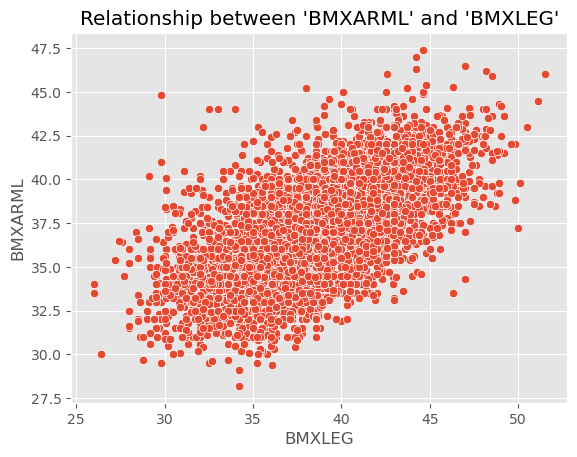

In [9]:
# Relationship between 'BMXARML' and 'BMXLEG'
sns.scatterplot(x = 'BMXLEG', y = 'BMXARML', data = dd)
plt.title("Relationship between 'BMXARML' and 'BMXLEG'")
plt.show()

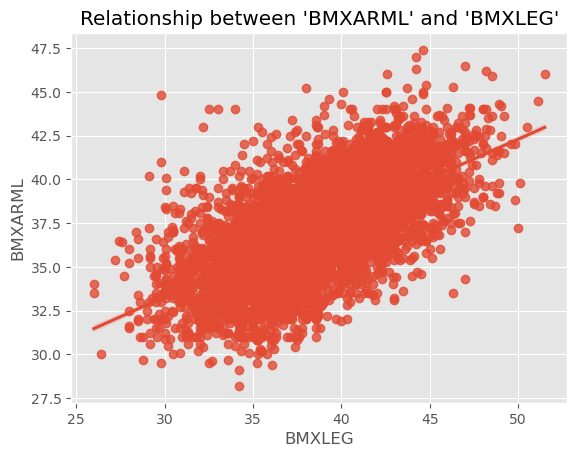

In [10]:
# Simple Linear Regression between 'BMXARML' and 'BMXLEG'
sns.regplot(x = 'BMXLEG', y = 'BMXARML', fit_reg = True, data = dd)
plt.title("Relationship between 'BMXARML' and 'BMXLEG'")
plt.show()

# Pearson correlation coefficient

In [11]:
# Pearson correlation coefficient between 'BMXARML' and 'BMXLEG' 
stats.pearsonr(dd['BMXARML'], dd['BMXLEG'])

PearsonRResult(statistic=0.6189135459893192, pvalue=0.0)

# Heatmap

<Axes: >

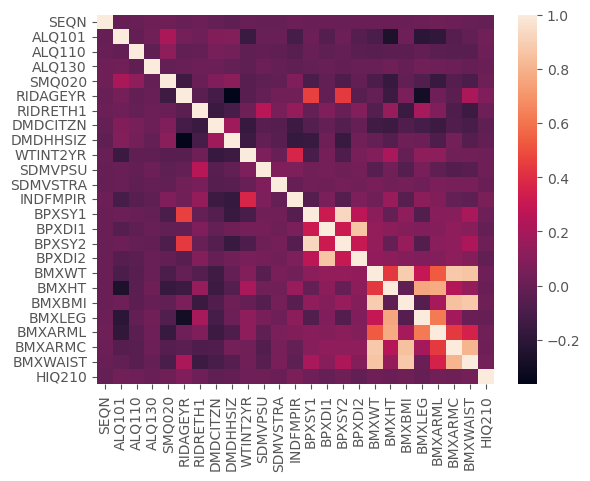

In [12]:
# Heatmap or (Carte des correlations)
sns.heatmap(dd.corr())

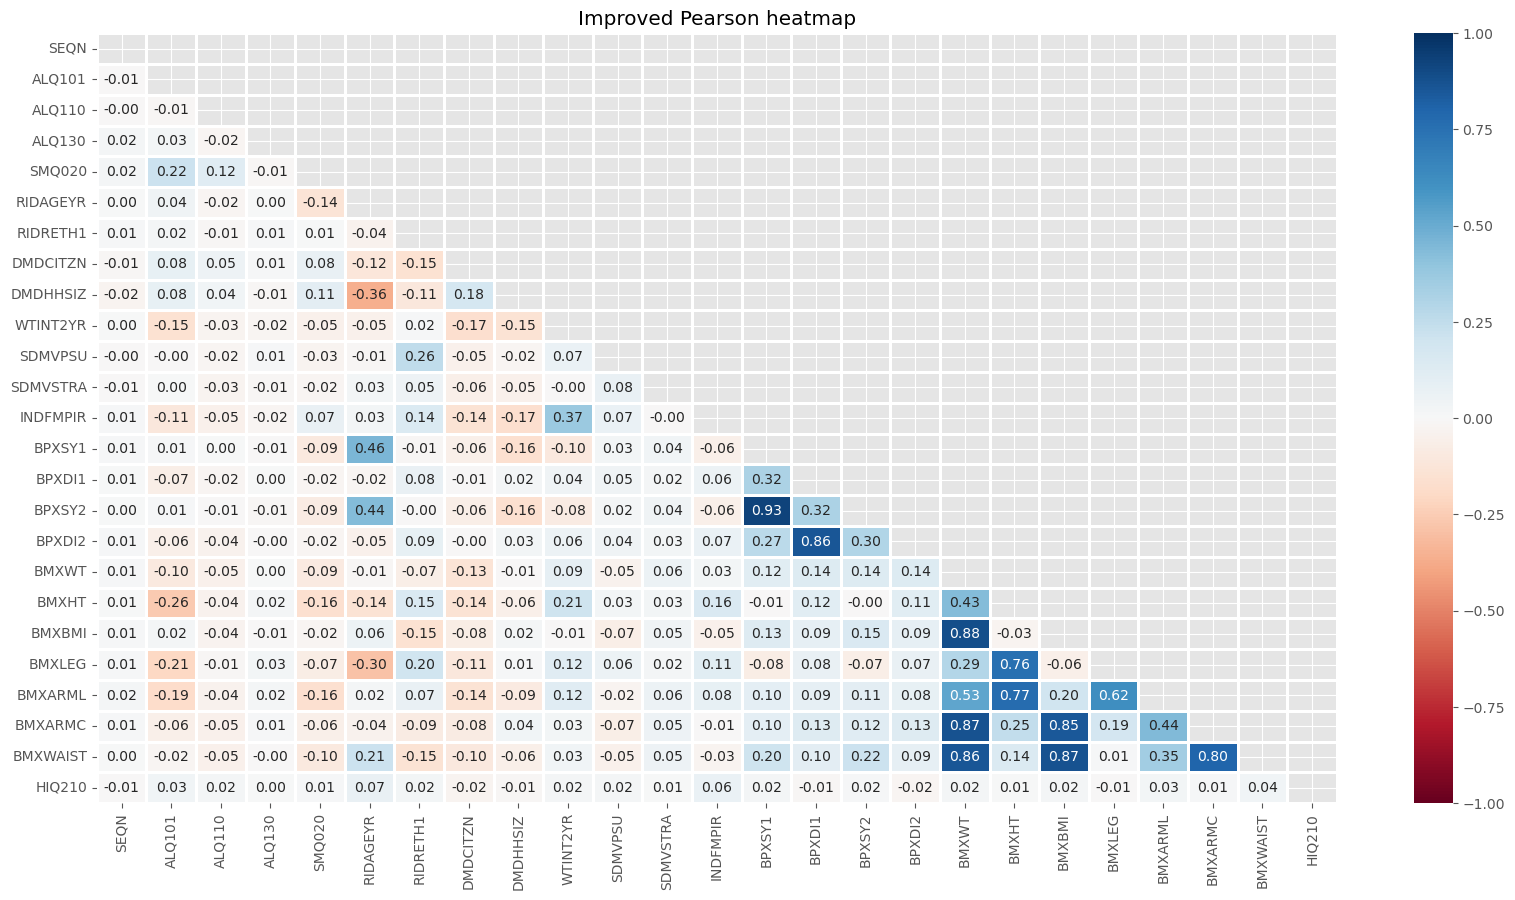

In [13]:
# Improved heatmap (Carte des correlations améliorée)

plt.figure(figsize=(20, 10))

mask = np.triu(np.ones_like(dd.corr(), dtype=bool))

sns.heatmap(dd.corr(), mask = mask, center = 0, cmap = 'RdBu', 
            linewidths = 1, annot = True, fmt = ".2f", vmin = -1, vmax = 1)

plt.title('Improved Pearson heatmap')
plt.show()

# Relationship between continuous quantitative variables: Scatterplot

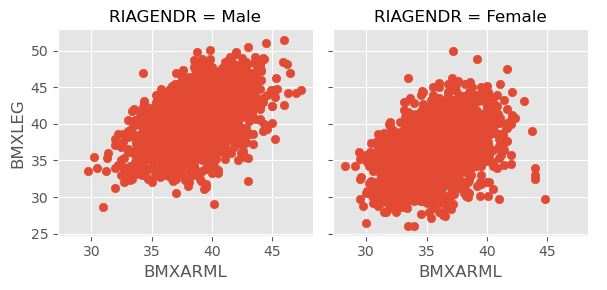

In [14]:
# Relationship between 'BMXARML' and 'BMXLEG' according to the gender
sns.FacetGrid(dd, col='RIAGENDR').map(plt.scatter, 'BMXARML', 'BMXLEG').add_legend();

In [19]:
# Pearson correlation coefficient between 'BMXARML' and 'BMXLEG' according to the gender
# Female
female = stats.pearsonr(dd[dd['RIAGENDR'] == 'Female']['BMXARML'], dd[dd['RIAGENDR'] == 'Female']['BMXLEG'])[0]
# Male
male = stats.pearsonr(dd[dd['RIAGENDR'] == 'Male']['BMXARML'], dd[dd['RIAGENDR'] == 'Male']['BMXLEG'])[0]

print("Pearson correlation coefficient between 'BMXARML' and 'BMXLEG according to the gender:\n- female = ", female, "\n- male = ", male)

Pearson correlation coefficient between 'BMXARML' and 'BMXLEG according to the gender:
- female =  0.4417207678131515 
- male =  0.5104480992874515


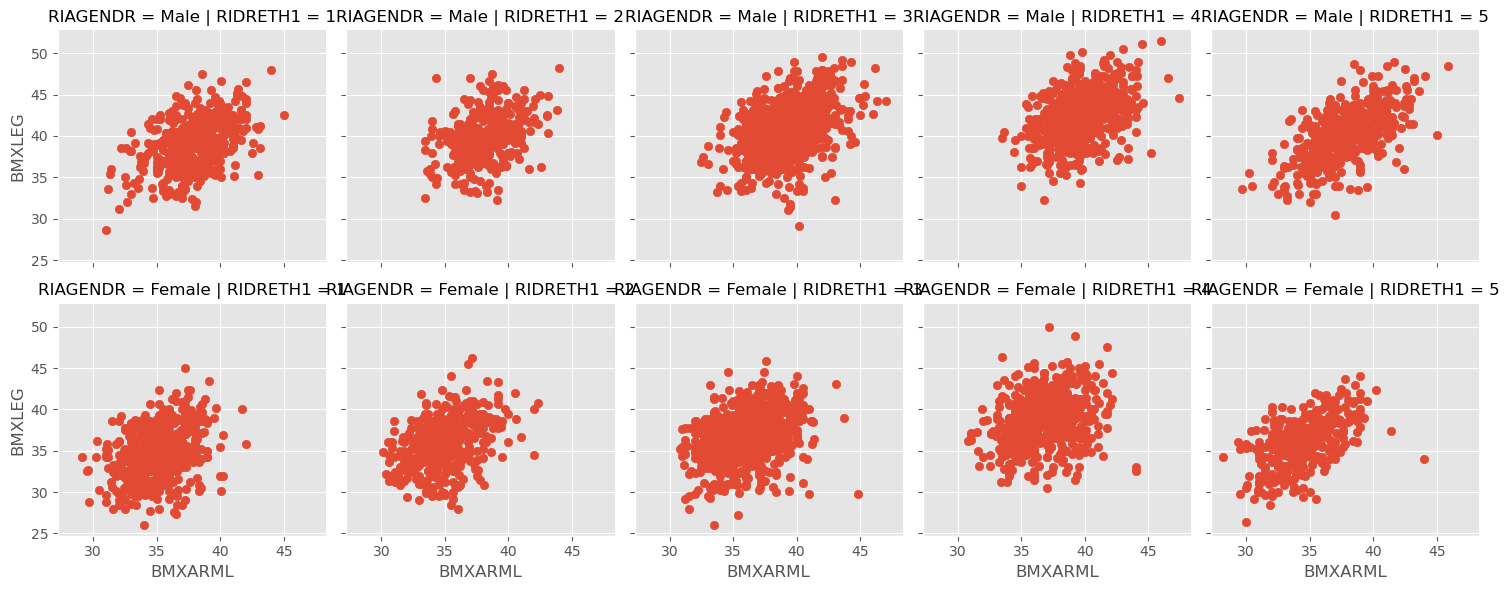

In [22]:
# Relationship between the variable 'BMXARML' and the variable 'BMXLEG', by sex and by ethnicity
sns.FacetGrid(dd, col='RIDRETH1', row='RIAGENDR').map(plt.scatter, 'BMXARML', 'BMXLEG').add_legend();

# 2D point density

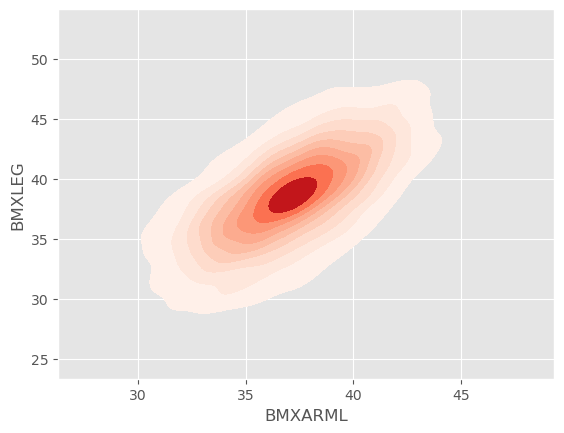

In [23]:
# 2D point density between 'BMXARML' and 'BMXLEG' 
sns.kdeplot(x = 'BMXARML', y = 'BMXLEG', cmap = 'Reds', shade = True, data = dd);

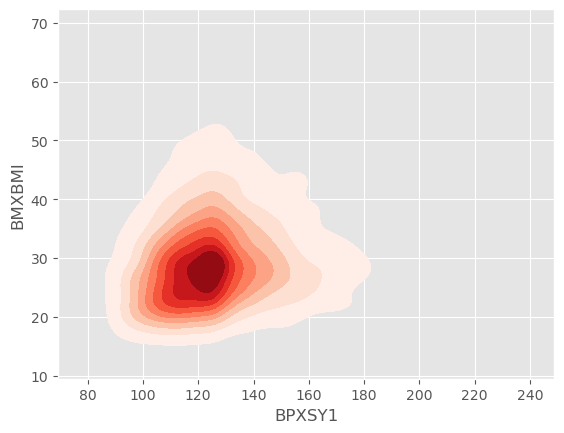

In [24]:
# 2D point density between 'BPXSY1' and 'BMXBMI'
sns.kdeplot(x = 'BPXSY1', y = 'BMXBMI', cmap = 'Reds', shade = True, data = dd);

In [25]:
# Pearson correlation coefficient between 'BPXSY1' and 'BMXBMI'
stats.pearsonr(dd['BPXSY1'], dd['BMXBMI'])

PearsonRResult(statistic=0.12841332998811406, pvalue=1.6222184362944243e-22)

# Relationship between qualitative variables: Contingency table

In [26]:
# Relationship between 'DMDEDUC2' and 'DMDMARTL'
pd.crosstab(dd['DMDEDUC2'], dd['DMDMARTL'])

DMDMARTL,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
DMDEDUC2,,,,,,,,
9-11,62,80,305,0,117,0,39,40
<9,52,66,341,0,65,0,43,88
College,120,85,827,0,253,0,22,59
Don't know,1,0,0,0,0,0,0,2
HS/GED,127,133,550,0,237,0,40,99
Missing,0,0,0,261,0,0,0,0
Some college/AA,217,163,757,0,332,2,42,108


In [27]:
# Relationship between 'DMDEDUC2' and 'DMDMARTL' normalized with lines
pd.crosstab(dd['DMDEDUC2'], dd['DMDMARTL']).apply(lambda z: z/z.sum(), axis = 1)

DMDMARTL,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
DMDEDUC2,,,,,,,,
9-11,0.096423,0.124417,0.474339,0.0,0.181960,0.000000,0.060653,0.062208
<9,0.079389,0.100763,0.520611,0.0,0.099237,0.000000,0.065649,0.134351
College,0.087848,0.062225,0.605417,0.0,0.185212,0.000000,0.016105,0.043192
Don't know,0.333333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.666667
HS/GED,0.107083,0.112142,0.463744,0.0,0.199831,0.000000,0.033727,0.083474
Missing,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000
Some college/AA,0.133868,0.100555,0.466996,0.0,0.204812,0.001234,0.025910,0.066626


In [28]:
# Relationship between 'DMDEDUC2' and 'DMDMARTL' normalized with columns
pd.crosstab(dd['DMDEDUC2'], dd['DMDMARTL']).apply(lambda z: z/z.sum(), axis = 0)

DMDMARTL,Divorced,Living with partner,Married,Missing,Never married,Refused,Separated,Widowed
DMDEDUC2,,,,,,,,
9-11,0.107081,0.151803,0.109712,0.0,0.116534,0.0,0.209677,0.101010
<9,0.089810,0.125237,0.122662,0.0,0.064741,0.0,0.231183,0.222222
College,0.207254,0.161290,0.297482,0.0,0.251992,0.0,0.118280,0.148990
Don't know,0.001727,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.005051
HS/GED,0.219344,0.252372,0.197842,0.0,0.236056,0.0,0.215054,0.250000
Missing,0.000000,0.000000,0.000000,1.0,0.000000,0.0,0.000000,0.000000
Some college/AA,0.374784,0.309298,0.272302,0.0,0.330677,1.0,0.225806,0.272727


In [29]:
# Relationship between 'DMDEDUC2' and 'DMDMARTL' according to the gender
pd.crosstab([dd['RIAGENDR'], dd['DMDEDUC2']], dd['DMDMARTL']).apply(lambda z: z/z.sum(), axis = 1)

DMDMARTL                  Divorced  Living with partner   Married  Missing  \
RIAGENDR DMDEDUC2                                                            
Female   9-11             0.113402             0.123711  0.412371      0.0   
         <9               0.091691             0.091691  0.424069      0.0   
         College          0.110181             0.055788  0.577406      0.0   
         Don't know       0.000000             0.000000  0.000000      0.0   
         HS/GED           0.121784             0.109777  0.413379      0.0   
         Missing          0.000000             0.000000  0.000000      1.0   
         Some college/AA  0.148515             0.099010  0.418042      0.0   
Male     9-11             0.082386             0.125000  0.525568      0.0   
         <9               0.065359             0.111111  0.630719      0.0   
         College          0.063174             0.069337  0.636364      0.0   
         Don't know       0.500000             0.000000  0.000000      0.0   
         HS/GED           0.092869             0.114428  0.512438      0.0   
         Missing          0.000000             0.000000  0.000000      1.0   
         Some college/AA  0.115169             0.102528  0.529494      0.0   

DMDMARTL                  Never married   Refused  Separated   Widowed  
RIAGENDR DMDEDUC2                                                       
Female   9-11                  0.171821  0.000000   0.075601  0.103093  
         <9                    0.108883  0.000000   0.088825  0.194842  
         College               0.182706  0.000000   0.016736  0.057183  
         Don't know            0.000000  0.000000   0.000000  1.000000  
         HS/GED                0.188679  0.000000   0.041166  0.125214  
         Missing               0.000000  0.000000   0.000000  0.000000  
         Some college/AA       0.210121  0.001100   0.031903  0.091309  
Male     9-11                  0.190341  0.000000   0.048295  0.028409  
         <9                    0.088235  0.000000   0.039216  0.065359  
         College               0.187982  0.000000   0.015408  0.027735  
         Don't know            0.000000  0.000000   0.000000  0.500000  
         HS/GED                0.210614  0.000000   0.026534  0.043118  
         Missing               0.000000  0.000000   0.000000  0.000000  
         Some college/AA       0.198034  0.001404   0.018258  0.035112

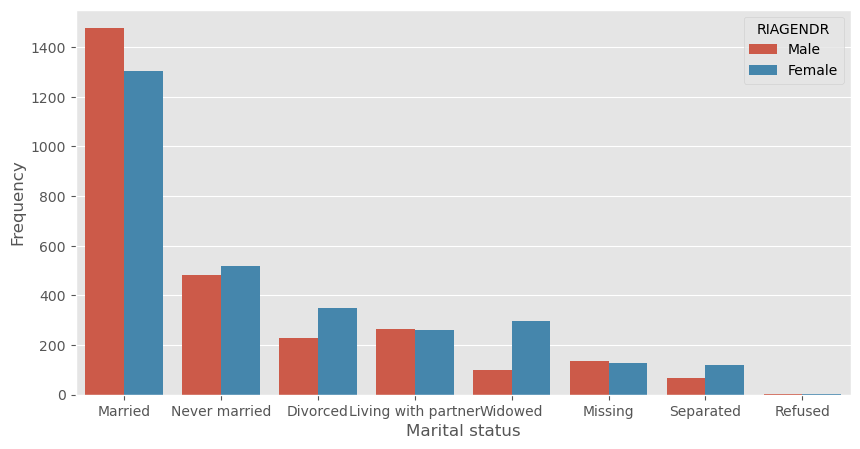

In [30]:
# Bar chart showing marital status according to the gender
plt.figure(figsize=(10, 5))
sns.countplot(x=dd['DMDMARTL'], hue = dd['RIAGENDR'], order= dd['DMDMARTL'].value_counts(ascending=False).index)
plt.xlabel('Marital status')
plt.ylabel('Frequency')
plt.show()

# Relationship between qualitative variables and quantitative variables

<Axes: xlabel='DMDMARTL', ylabel='RIDAGEYR'>

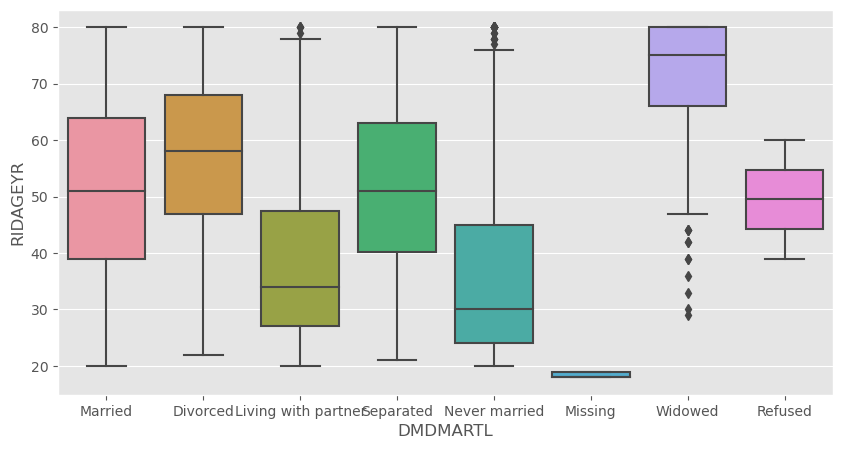

In [32]:
# Relationship between the ages according to the marital status
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'DMDMARTL', y = 'RIDAGEYR', data = dd)

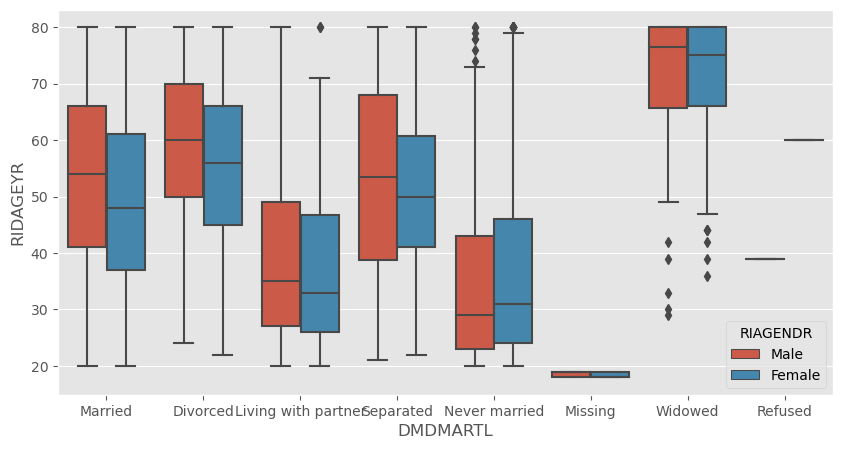

In [33]:
# Relationship between the ages according to the marital status and the gender
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'DMDMARTL', y = 'RIDAGEYR', hue = 'RIAGENDR', data = dd);

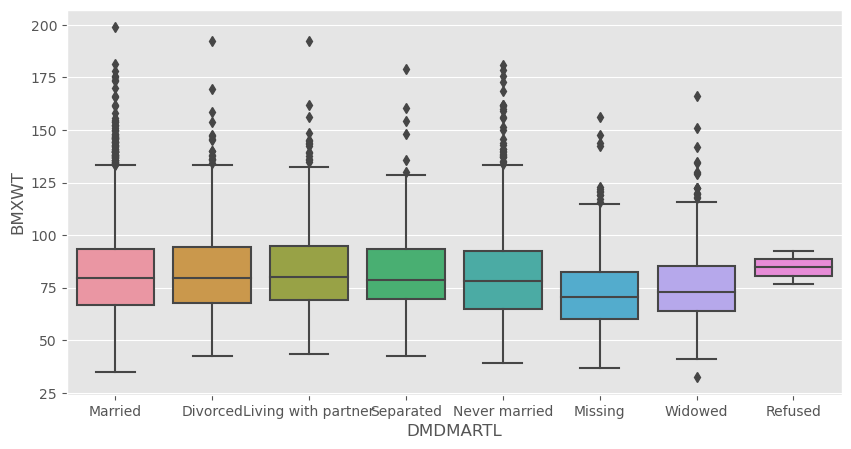

In [34]:
# Relationship between the weights according to the marital status
plt.figure(figsize=(10, 5))
sns.boxplot(x = 'DMDMARTL', y = 'BMXWT', data = dd);

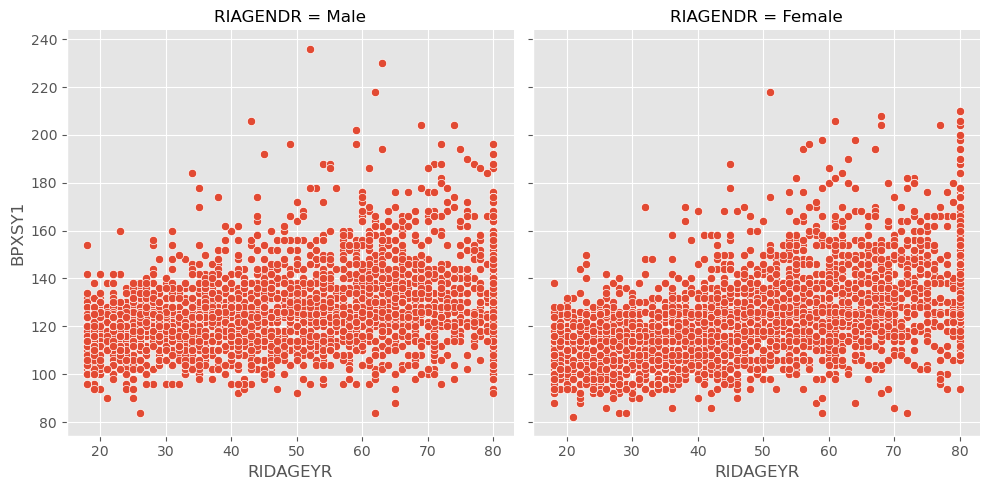

In [35]:
# Blood pressure according to age differentiated by gender
sns.relplot(x = 'RIDAGEYR', y = 'BPXSY1', col = 'RIAGENDR', kind = 'scatter', data = dd);

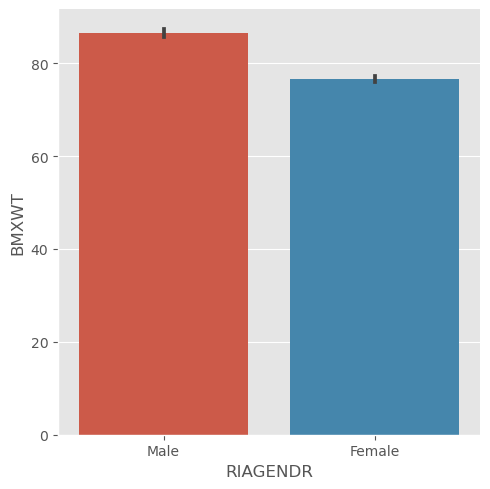

In [36]:
# Weights according to the gender
sns.catplot(x = 'RIAGENDR', y = 'BMXWT', kind = 'bar', data = dd);